## Representação de Texto: Bag of Words (BoW) e TF-IDF

Modelos de Machine Learning exigem que dados textuais sejam convertidos em formatos numéricos para serem processados. 

Duas técnicas clássicas para essa vetorização são:

- **Bag of Words (BoW)**: contabiliza a frequência de palavras nos documentos, desconsiderando ordem e contexto.
- **TF-IDF (Term Frequency-Inverse Document Frequency)**: calcula pesos para as palavras, destacando termos mais relevantes ao penalizar palavras comuns.

Neste notebook, aplicaremos essas duas técnicas em um corpus simples de textos em português para compreender seu funcionamento.


### Corpus de exemplo

Utilizaremos um conjunto de frases curtas que tratam de inteligência artificial e processamento de linguagem natural:


In [6]:
corpus = [
    "A inteligência artificial está transformando o mundo.",
    "Aprendizado de máquina é uma subárea da inteligência artificial.",
    "O processamento de linguagem natural permite que computadores entendam textos.",
    "Modelos de linguagem aprendem com grandes volumes de dados.",
    "BoW e TF-IDF são técnicas básicas de vetorização de texto."
]

### Imports

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt

#### Vetorização com Bag of Words (BoW)

A técnica Bag of Words transforma o texto em uma matriz onde cada linha representa um documento e cada coluna representa uma palavra do vocabulário extraído. Os valores indicam a frequência com que a palavra aparece no documento.

Usaremos a classe `CountVectorizer` do scikit-learn para gerar essa matriz.


In [7]:
vectorizer_bow = CountVectorizer()
bow_matrix = vectorizer_bow.fit_transform(corpus)
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer_bow.get_feature_names_out())

print("🔹 Representação BoW")
display(bow_df)

🔹 Representação BoW


,aprendem,aprendizado,artificial,bow,básicas,com,computadores,da,dados,de,...,subárea,são,texto,textos,tf,transformando,técnicas,uma,vetorização,volumes
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,1,2,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0,0,2,...,0,1,1,0,1,0,1,0,1,0


#### Vetorização com TF-IDF

O TF-IDF também cria uma matriz similar à do BoW, porém atribui pesos às palavras considerando sua importância relativa. Palavras que aparecem em muitos documentos recebem pesos menores, enquanto termos mais específicos ganham maior destaque.

Utilizaremos a classe `TfidfVectorizer` do scikit-learn para essa vetorização.


In [8]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("🔹 Representação TF-IDF")
display(tfidf_df)

🔹 Representação TF-IDF


,aprendem,aprendizado,artificial,bow,básicas,com,computadores,da,dados,de,...,subárea,são,texto,textos,tf,transformando,técnicas,uma,vetorização,volumes
0,0.000000,0.000000,0.388988,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.00000,0.48214,0.00000,0.000000,0.00000,0.000000
1,0.000000,0.388684,0.313587,0.00000,0.00000,0.000000,0.000000,0.388684,0.000000,0.218978,...,0.388684,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.388684,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.354256,0.000000,0.000000,0.199581,...,0.000000,0.00000,0.00000,0.354256,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000
3,0.355323,0.000000,0.000000,0.00000,0.00000,0.355323,0.000000,0.000000,0.355323,0.400366,...,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.355323
4,0.000000,0.000000,0.000000,0.32845,0.32845,0.000000,0.000000,0.000000,0.000000,0.370086,...,0.000000,0.32845,0.32845,0.000000,0.32845,0.00000,0.32845,0.000000,0.32845,0.000000


### Comparação entre BoW e TF-IDF

- O BoW é simples e conta a frequência das palavras, sem considerar a importância relativa delas.
- O TF-IDF melhora essa representação ao ponderar a frequência pela raridade da palavra no corpus, destacando termos mais informativos.
- Ambas as representações resultam em matrizes esparsas, muito utilizadas como entrada para modelos de machine learning clássicos.


In [9]:
print("\n📌 Observações:")
print("- BoW apenas conta palavras, não mede importância relativa.")
print("- TF-IDF destaca palavras informativas e penaliza palavras comuns entre os documentos.")


📌 Observações:
- BoW apenas conta palavras, não mede importância relativa.
- TF-IDF destaca palavras informativas e penaliza palavras comuns entre os documentos.


### Comparação Gráfica: Bag of Words vs TF-IDF

Nesta seção, comparamos visualmente as representações Bag of Words (BoW) e TF-IDF aplicadas a um pequeno corpus.

O modelo **Bag of Words** simplesmente conta quantas vezes cada palavra aparece em cada documento, ignorando o contexto e a importância relativa no corpus.

Por outro lado, o modelo **TF-IDF (Term Frequency - Inverse Document Frequency)** leva em consideração não só a frequência da palavra em um documento, mas também o quão comum ou rara ela é nos demais documentos. Isso ajuda a reduzir o peso de palavras muito comuns e destacar termos mais relevantes.

O gráfico abaixo mostra como os pesos atribuídos às palavras variam entre as duas abordagens:
- **BoW** apresenta apenas contagens absolutas.
- **TF-IDF** normaliza os pesos para refletir a importância das palavras no corpus.


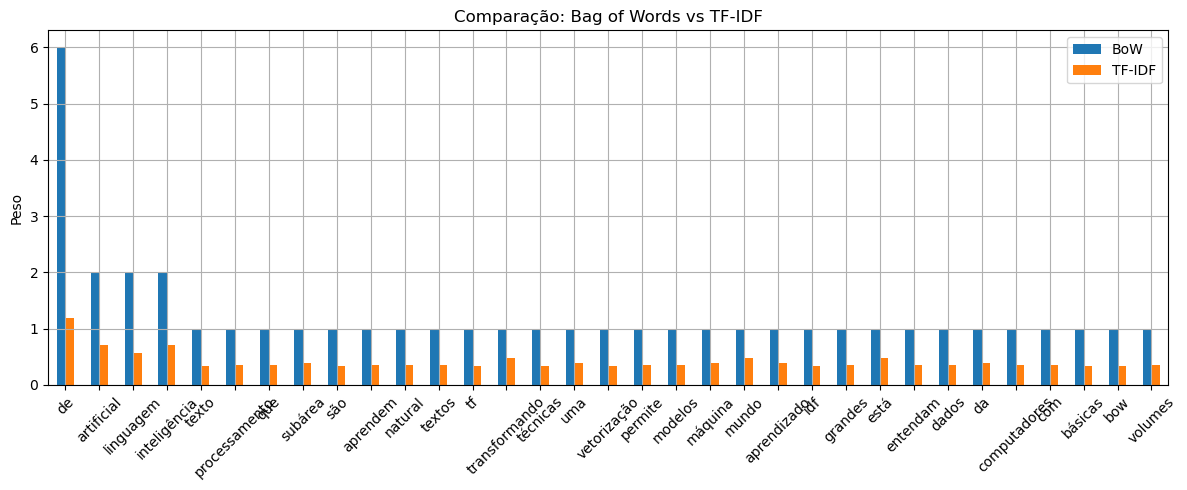

In [14]:
# Somar os pesos de cada palavra
bow_sum = bow_df.sum().sort_values(ascending=False)
tfidf_sum = tfidf_df.sum().sort_values(ascending=False)

# Unir os dados para comparação
df_compare = pd.concat([bow_sum, tfidf_sum], axis=1)
df_compare.columns = ['BoW', 'TF-IDF']

# Plot do gráfico comparativo
df_compare.plot(kind='bar', figsize=(12, 5), title='Comparação: Bag of Words vs TF-IDF')
plt.ylabel('Peso')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusão

Neste notebook, exploramos duas das principais formas de representar textos numericamente: **Bag of Words (BoW)** e **TF-IDF**.

Ambas as técnicas convertem frases em vetores, facilitando a aplicação de modelos de aprendizado de máquina. Enquanto o BoW apenas contabiliza a frequência de palavras, o TF-IDF vai além e pondera essas frequências com base na raridade dos termos no conjunto de documentos.

Apesar de simples, essas abordagens são extremamente úteis em tarefas como classificação de texto, análise de sentimentos e recuperação de informação.
